In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import networkx as nx
#%matplotlib notebook

In [2]:
datasetFilePath = 'C:\\Users\\ryan\\Documents\\nfl-big-data-bowl-2022\\'
#datasetFilePath = '~/Documents/nfl-big-data-bowl-2022/'
gamesFilePath = datasetFilePath + 'games.csv'
PFFScoutingFilePath = datasetFilePath + 'PFFScoutingData.csv'
playsFilePath = datasetFilePath + 'plays.csv'
playersFilePath = datasetFilePath + 'players.csv'
tracking2018FilePath = datasetFilePath + 'tracking2018.csv'
tracking2019FilePath = datasetFilePath + 'tracking2019.csv'
tracking2020FilePath = datasetFilePath + 'tracking2020.csv'
PFFScoutingFilePath = datasetFilePath + 'PFFScoutingData.csv'


In [3]:
gamesDF = pd.read_csv(gamesFilePath);
PFFScoutingDF = pd.read_csv(PFFScoutingFilePath);
playsDF = pd.read_csv(playsFilePath)
playersDF = pd.read_csv(playersFilePath)
tracking2018DF = pd.read_csv(tracking2018FilePath)
tracking2019DF = pd.read_csv(tracking2019FilePath)
tracking2020DF = pd.read_csv(tracking2020FilePath)
PFFScoutingDF = pd.read_csv(PFFScoutingFilePath)


In [4]:
frames = [tracking2018DF, tracking2019DF, tracking2020DF]
mergedTrackingDF = pd.concat(frames, keys=["2018", "2019", "2020"])

In [5]:
#playsDF.groupby(['specialTeamsPlayType', 'specialTeamsResult']).size().reset_index(name='counts')

In [6]:
#playsDF.groupby(['specialTeamsPlayType', 'specialTeamsResult']).size()

In [7]:
#my_crosstab = pd.crosstab(index=playsDF["specialTeamsPlayType"], 
#                            columns=playsDF["specialTeamsResult"])

my_crosstab = pd.crosstab(index=playsDF["specialTeamsResult"], 
                            columns=playsDF["specialTeamsPlayType"])

In [8]:
my_crosstab

specialTeamsPlayType,Extra Point,Field Goal,Kickoff,Punt
specialTeamsResult,,,,
Blocked Kick Attempt,24,37,0,0
Blocked Punt,0,0,0,39
Downed,0,1,4,829
Fair Catch,0,0,5,1640
Kick Attempt Good,3252,2218,0,0
Kick Attempt No Good,199,386,0,0
Kickoff Team Recovery,0,0,16,0
Muffed,0,0,60,154
Non-Special Teams Result,13,14,0,74


<AxesSubplot:xlabel='specialTeamsPlayType', ylabel='specialTeamsResult'>

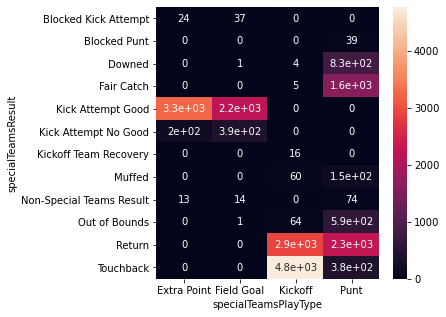

In [9]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(my_crosstab, annot=True)

In [10]:
def process_punts(filter):
    df = playsDF.loc[(playsDF['specialTeamsPlayType'] == 'Punt') & (playsDF['specialTeamsResult'].isin(filter))]
    df = df[['playId', 'gameId','specialTeamsResult', 'playResult', 'possessionTeam', 'kickerId']]
    df['operationTime'] = 0
    df['hangTime'] = 0
    df['kickDirectionActual'] = 0
    df['kickDirectionIntended'] = 0
    df['ActualVsIntended'] = 0
    df['kickType'] = 0
    
    for index,  x in df.iterrows():
        df.loc[[index], ['operationTime']] = PFFScoutingDF['operationTime'].loc[x['playId'] == PFFScoutingDF['playId']]
        df.loc[[index], ['hangTime']] = PFFScoutingDF['hangTime'].loc[x['playId'] == PFFScoutingDF['playId']]
        df.loc[[index], ['kickDirectionActual']] = PFFScoutingDF['kickDirectionActual'].loc[x['playId'] == PFFScoutingDF['playId']]
        df.loc[[index], ['kickDirectionIntended']] = PFFScoutingDF['kickDirectionIntended'].loc[x['playId'] == PFFScoutingDF['playId']]
        actual = df.loc[index, 'kickDirectionActual']
        intended = df.loc[index, 'kickDirectionIntended']
        df.loc[index, 'ActualVsIntended'] = (actual == intended)
        df.loc[[index], ['kickType']] = PFFScoutingDF['kickType'].loc[x['playId'] == PFFScoutingDF['playId']]
        
    return df

In [11]:
good_filter = ['Fair Catch', 'Touchback']
bad_filter = ['Return', 'Out of Bounds']

good_punt_df = process_punts(good_filter)
bad_punt_df = process_punts(bad_filter)

Text(0.5, 1.0, 'Good punt vs bad punt - Hangtime and distance')

<Figure size 720x720 with 0 Axes>

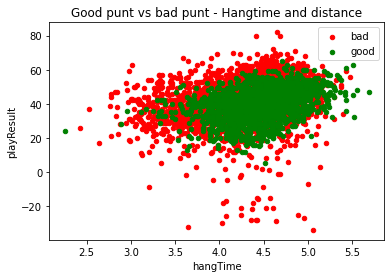

In [12]:
plt.figure(figsize=(10,10))
ax = bad_punt_df.plot(kind='scatter', x='hangTime', y='playResult',
                                           color='Red', label='bad')
good_punt_df.plot(kind='scatter', x='hangTime', y='playResult',
                                          color='Green', label='good', ax=ax)

plt.title("Good punt vs bad punt - Hangtime and distance")

#plt.show()

In [13]:
good_punt_df.loc[(good_punt_df['ActualVsIntended'] == False)]

,playId,gameId,specialTeamsResult,playResult,possessionTeam,kickerId,operationTime,hangTime,kickDirectionActual,kickDirectionIntended,ActualVsIntended,kickType
4,872,2018090600,Touchback,45,PHI,45603.0,2.00,4.35,L,C,False,N
286,943,2018090912,Fair Catch,51,GB,46241.0,2.28,4.58,R,C,False,N
409,2741,2018091600,Touchback,22,ATL,37267.0,2.29,4.45,C,L,False,A
447,223,2018091602,Fair Catch,44,GB,46241.0,2.13,5.02,C,R,False,N
492,2107,2018091603,Fair Catch,45,NO,34615.0,2.08,4.91,NaN,NaN,False,N
756,1811,2018091613,Fair Catch,40,NYG,43517.0,2.14,4.62,C,L,False,A
797,116,2018092000,Fair Catch,44,CLE,34723.0,2.08,4.64,C,L,False,N
858,4324,2018092300,Fair Catch,43,ATL,37267.0,2.19,4.56,C,R,False,A
1580,2863,2018093010,Fair Catch,47,LAC,43468.0,1.91,4.38,C,L,False,N
1802,3300,2018100703,Touchback,36,BAL,31018.0,2.09,3.34,C,L,False,A


In [14]:
def plot3D_kickType(df):
    x1 = df.loc[(df['kickType'] == 'N'), 'hangTime']
    y1 = df.loc[(df['kickType'] == 'N'), 'operationTime']
    z1 = df.loc[(df['kickType'] == 'N'), 'playResult']

    x2 = df.loc[(df['kickType'] == 'R'), 'hangTime']
    y2 = df.loc[(df['kickType'] == 'R'), 'operationTime']
    z2 = df.loc[(df['kickType'] == 'R'), 'playResult']

    x3 = df.loc[(df['kickType'] == 'A'), 'hangTime']
    y3 = df.loc[(df['kickType'] == 'A'), 'operationTime']
    z3 = df.loc[(df['kickType'] == 'A'), 'playResult']


    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, y1, z1,
               linewidths=1, alpha=.7,
               edgecolor='k',
               s = 200,
               label = "Normal"
               )

    ax.scatter(x2, y2, z2,
               linewidths=1, alpha=.7,
               edgecolor='k',
               s = 200,
               label = "Rugby"
               )
    ax.scatter(x3, y3, z3,
               linewidths=1, alpha=.7,
               edgecolor='k',
               s = 200,
               label = "Aussie"
               )
    ax.legend()
    plt.show()

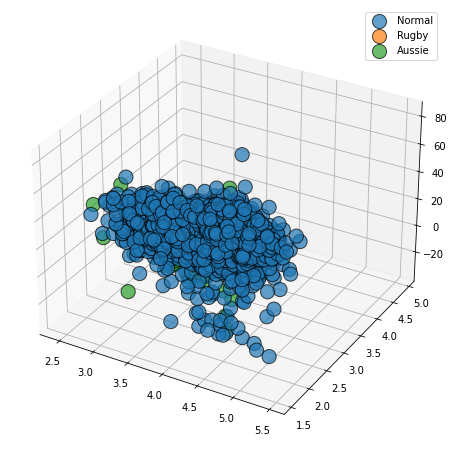

In [15]:
#from tools import plot3D_kickType
plot3D_kickType(bad_punt_df)
#good_punt_df[good_punt_df['kickType'] == 'A']

In [16]:
def plot_ActualVsIntended(df, x_axis, y_axis, title):
    plt.figure(figsize=(10,10))
    ax = df.loc[(df['ActualVsIntended'] == True)].plot(kind='scatter', x=x_axis, y=y_axis,
                                               color='Green', label='TRUE')
    ax1 = df.loc[(df['ActualVsIntended'] == False)].plot(kind='scatter', x=x_axis, y=y_axis,
                                              color='Red', label='FALSE', ax=ax)

    plt.title(title)
    plt.show()

<Figure size 720x720 with 0 Axes>

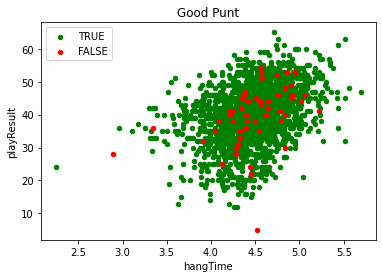

<Figure size 720x720 with 0 Axes>

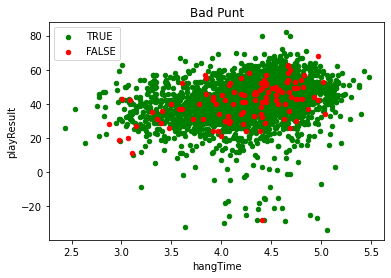

In [17]:
plot_ActualVsIntended(good_punt_df, 'hangTime', 'playResult', 'Good Punt')
plot_ActualVsIntended(bad_punt_df, 'hangTime', 'playResult', 'Bad Punt')

In [18]:
def plot_kickDirectionActual(df, x_axis, y_axis, title):
    plt.figure(figsize=(10,10))
    ax = df.loc[(df['kickDirectionActual'] == 'L')].plot(kind='scatter', x=x_axis, y=y_axis,
                                               color='Red', label='LEFT')
    ax1 = df.loc[(df['kickDirectionActual'] == 'R')].plot(kind='scatter',  x=x_axis, y=y_axis,
                                              color='Green', label='RIGHT', ax=ax)
    ax2 = df.loc[(df['kickDirectionActual'] == 'C')].plot(kind='scatter',  x=x_axis, y=y_axis,
                                              color='BLUE', label='CENTER', ax=ax1)
    ax.legend()
    plt.title(title)
    plt.show()

<Figure size 720x720 with 0 Axes>

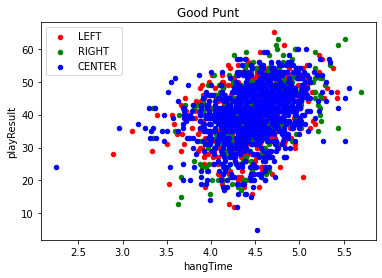

<Figure size 720x720 with 0 Axes>

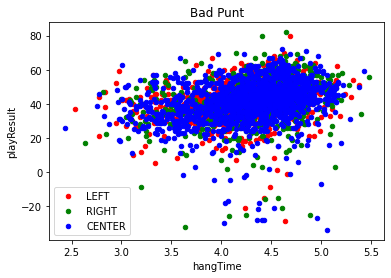

In [19]:
plot_kickDirectionActual(good_punt_df, 'hangTime', 'playResult', 'Good Punt')
plot_kickDirectionActual(bad_punt_df, 'hangTime', 'playResult', 'Bad Punt')

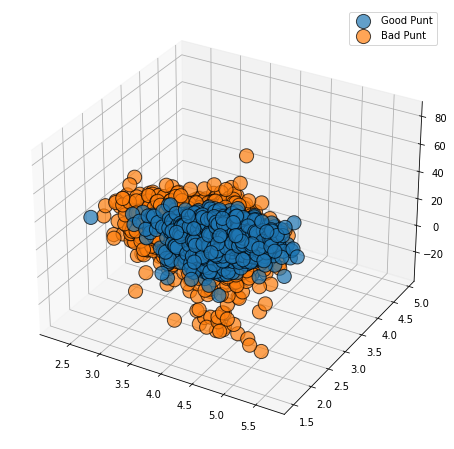

In [20]:
#%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = good_punt_df['hangTime']
y = good_punt_df['operationTime']
z = good_punt_df['playResult']

x1 = bad_punt_df['hangTime']
y1 = bad_punt_df['operationTime']
z1 = bad_punt_df['playResult']

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7, label = "Good Punt",
           edgecolor='k',
           s = 200,
           )

ax.scatter(x1, y1, z1,
           linewidths=1, alpha=.7, label = "Bad Punt",
           edgecolor='k',
           s = 200,
           )
ax.legend()
plt.show()

In [21]:
#%matplotlib notebook
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#import numpy as np

def plot3D_kickDirectionActual(df):
    x = df.loc[(df['kickDirectionActual'] == 'L'), 'hangTime']
    y = df.loc[(df['kickDirectionActual'] == 'L'), 'operationTime']
    z = df.loc[(df['kickDirectionActual'] == 'L'), 'playResult']

    x1 = df.loc[(df['kickDirectionActual'] == 'C'), 'hangTime']
    y1 = df.loc[(df['kickDirectionActual'] == 'C'), 'operationTime']
    z1 = df.loc[(df['kickDirectionActual'] == 'C'), 'playResult']

    x2 = df.loc[(df['kickDirectionActual'] == 'R'), 'hangTime']
    y2 = df.loc[(df['kickDirectionActual'] == 'R'), 'operationTime']
    z2 = df.loc[(df['kickDirectionActual'] == 'R'), 'playResult']


    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z,
               linewidths=1, alpha=.7,
               edgecolor='k',
               s = 200,
               )

    ax.scatter(x1, y1, z1,
               linewidths=1, alpha=.7,
               edgecolor='k',
               s = 200,
               )
    ax.scatter(x2, y2, z2,
               linewidths=1, alpha=.7,
               edgecolor='k',
               s = 200,
               )
    plt.show()

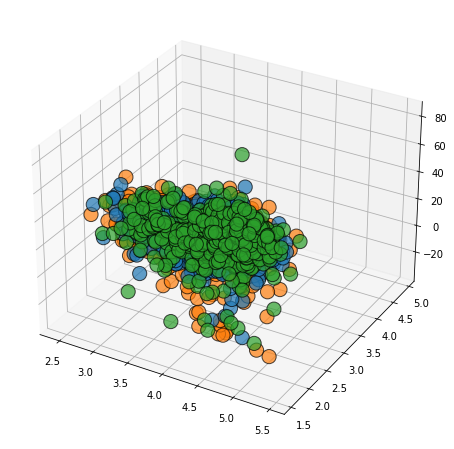

In [22]:
plot3D_kickDirectionActual(bad_punt_df)

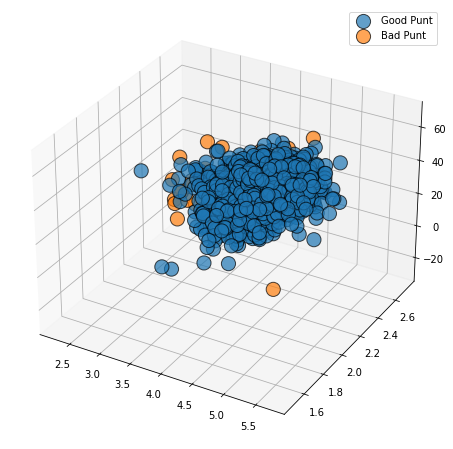

In [23]:
#%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = good_punt_df.loc[(good_punt_df['ActualVsIntended'] == True), 'hangTime']
y = good_punt_df.loc[(good_punt_df['ActualVsIntended'] == True), 'operationTime']
z = good_punt_df.loc[(good_punt_df['ActualVsIntended'] == True), 'playResult']

x1 = bad_punt_df.loc[(bad_punt_df['ActualVsIntended'] == False), 'hangTime']
y1 = bad_punt_df.loc[(bad_punt_df['ActualVsIntended'] == False), 'operationTime']
z1 = bad_punt_df.loc[(bad_punt_df['ActualVsIntended'] == False), 'playResult']

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7, label = "Good Punt",
           edgecolor='k',
           s = 200,
           )

ax.scatter(x1, y1, z1, label = "Bad Punt",
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           )
ax.legend()
plt.show()

### Field Goal

In [25]:
def process_field_goals(filter):
    df = playsDF.loc[(playsDF['specialTeamsPlayType'] == 'Field Goal') & (playsDF['specialTeamsResult'].isin(filter))]
    df = df[['playId', 'specialTeamsResult', 'playResult']]
    df['operationTime'] = 0
    df['hangTime'] = 0
    df['kickDirectionActual'] = 0
    df['kickDirectionIntended'] = 0
    df['ActualVsIntended'] = 0
    df['kickType'] = 0
    
    for index,  x in df.iterrows():
        df.loc[[index], ['operationTime']] = PFFScoutingDF['operationTime'].loc[x['playId'] == PFFScoutingDF['playId']]
        df.loc[[index], ['hangTime']] = PFFScoutingDF['hangTime'].loc[x['playId'] == PFFScoutingDF['playId']]
        df.loc[[index], ['kickDirectionActual']] = PFFScoutingDF['kickDirectionActual'].loc[x['playId'] == PFFScoutingDF['playId']]
        df.loc[[index], ['kickDirectionIntended']] = PFFScoutingDF['kickDirectionIntended'].loc[x['playId'] == PFFScoutingDF['playId']]
        actual = df.loc[index, 'kickDirectionActual']
        intended = df.loc[index, 'kickDirectionIntended']
        df.loc[index, 'ActualVsIntended'] = (actual == intended)
        df.loc[[index], ['kickType']] = PFFScoutingDF['kickType'].loc[x['playId'] == PFFScoutingDF['playId']]
        
    return df

In [26]:
good_field_goal = ['Kick Attempt Good']
bad_field_goal = ['Kick Attempt No Good']

good_field_goal_df = process_field_goals(good_field_goal)
good_field_goal_df.shape

bad_field_goal_df = process_field_goals(bad_field_goal)
bad_field_goal_df.shape

(386, 9)

In [27]:
def process_punt_distance(filter):
    df = playsDF.loc[(playsDF['specialTeamsPlayType'] == 'Punt') & (playsDF['specialTeamsResult'].isin(filter))]
    df = df[['playId', 'specialTeamsResult', 'playResult']]
    df['operationTime'] = 0
    df['hangTime'] = 0
    df['kickDirectionActual'] = 0
    df['kickDirectionIntended'] = 0
    df['ActualVsIntended'] = 0
    df['kickType'] = 0
    
    for index,  x in df.iterrows():
        df.loc[[index], ['operationTime']] = PFFScoutingDF['operationTime'].loc[x['playId'] == PFFScoutingDF['playId']]
        df.loc[[index], ['hangTime']] = PFFScoutingDF['hangTime'].loc[x['playId'] == PFFScoutingDF['playId']]
        df.loc[[index], ['kickDirectionActual']] = PFFScoutingDF['kickDirectionActual'].loc[x['playId'] == PFFScoutingDF['playId']]
        df.loc[[index], ['kickDirectionIntended']] = PFFScoutingDF['kickDirectionIntended'].loc[x['playId'] == PFFScoutingDF['playId']]
        actual = df.loc[index, 'kickDirectionActual']
        intended = df.loc[index, 'kickDirectionIntended']
        df.loc[index, 'ActualVsIntended'] = (actual == intended)
        df.loc[[index], ['kickType']] = PFFScoutingDF['kickType'].loc[x['playId'] == PFFScoutingDF['playId']]
    
    small_punt = df.loc[(df['playResult'] <= 10)]
    medium_punt = df.loc[(df['playResult'] > 10) & (df['playResult'] < 20)]
    long_punt = df.loc[(df['playResult'] > 20)]
    
    return small_punt, medium_punt, long_punt

In [28]:
small_df, medium_df, long_df = process_punt_distance(good_filter) 

In [29]:
def plot_play_result(df, x_axis, y_axis, title):
    plt.figure(figsize=(10,10))
    ax = df.loc[(df['playResult'] <= 30)].plot(kind='scatter', x=x_axis, y=y_axis,
                                               color='Red', label='Small')
    ax1 = df.loc[(df['playResult'] > 30) & (df['playResult'] <= 60)].plot(kind='scatter',  x=x_axis, y=y_axis,
                                              color='Green', label='Medium', ax=ax)
    ax2 = df.loc[(df['playResult'] > 60)].plot(kind='scatter',  x=x_axis, y=y_axis,
                                              color='BLUE', label='Long', ax=ax1)
    ax.legend()
    plt.title(title)
    #plt.show()

<Figure size 720x720 with 0 Axes>

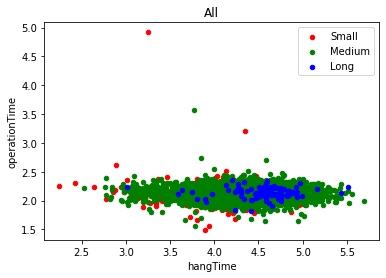

<Figure size 720x720 with 0 Axes>

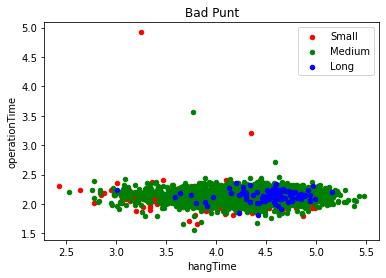

<Figure size 720x720 with 0 Axes>

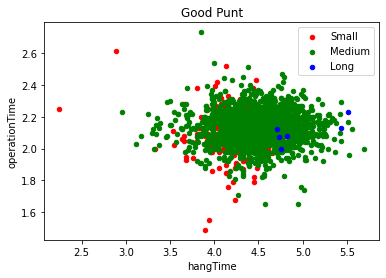

In [30]:
plot_play_result(pd.concat([good_punt_df, bad_punt_df], ignore_index=True), 'hangTime', 'operationTime', 'All')
plot_play_result(bad_punt_df, 'hangTime', 'operationTime', 'Bad Punt')
plot_play_result(good_punt_df, 'hangTime', 'operationTime', 'Good Punt')

### Kickoff

In [31]:
def process_kickoff(filter):
    df = playsDF.loc[(playsDF['specialTeamsPlayType'] == 'Kickoff') & (playsDF['specialTeamsResult'].isin(filter))]
    df = df[['playId', 'specialTeamsResult', 'playResult']]
    df['operationTime'] = 0
    df['hangTime'] = 0
    df['kickDirectionActual'] = 0
    df['kickDirectionIntended'] = 0
    df['ActualVsIntended'] = 0
    df['kickType'] = 0
    
    for index,  x in df.iterrows():
        df.loc[[index], ['operationTime']] = PFFScoutingDF['operationTime'].loc[x['playId'] == PFFScoutingDF['playId']]
        df.loc[[index], ['hangTime']] = PFFScoutingDF['hangTime'].loc[x['playId'] == PFFScoutingDF['playId']]
        df.loc[[index], ['kickDirectionActual']] = PFFScoutingDF['kickDirectionActual'].loc[x['playId'] == PFFScoutingDF['playId']]
        df.loc[[index], ['kickDirectionIntended']] = PFFScoutingDF['kickDirectionIntended'].loc[x['playId'] == PFFScoutingDF['playId']]
        actual = df.loc[index, 'kickDirectionActual']
        intended = df.loc[index, 'kickDirectionIntended']
        df.loc[index, 'ActualVsIntended'] = (actual == intended)
        df.loc[[index], ['kickType']] = PFFScoutingDF['kickType'].loc[x['playId'] == PFFScoutingDF['playId']]
        
    return df

In [32]:
good_kickoff_filter = ['Touchback']
bad_kickoff_filter = ['Return']

good_kickoff_df = process_kickoff(good_kickoff_filter)
bad_kickoff_df = process_kickoff(bad_kickoff_filter)

In [33]:
def plot_good_and_bad(good_df, bad_df):
    plt.figure(figsize=(10,10))
    ax = bad_df.plot(kind='scatter', x='hangTime', y='playResult',
                                               color='Red', label='bad')
    good_df.plot(kind='scatter', x='hangTime', y='playResult',
                                              color='Green', label='good', ax=ax)

    plt.title("Good punt vs bad punt - Hangtime and distance")

    #plt.show()

<Figure size 720x720 with 0 Axes>

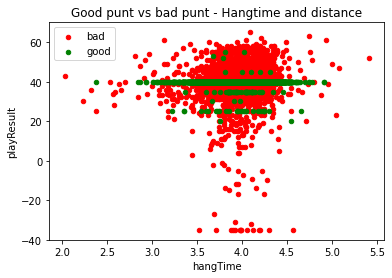

In [34]:
plot_good_and_bad(good_kickoff_df, bad_kickoff_df)

In [35]:
good_punt_df.dtypes

playId                     int64
gameId                     int64
specialTeamsResult        object
playResult                 int64
possessionTeam            object
kickerId                 float64
operationTime            float64
hangTime                 float64
kickDirectionActual       object
kickDirectionIntended     object
ActualVsIntended          object
kickType                  object
dtype: object

In [36]:
teams = playsDF['possessionTeam'].unique()
print(teams)

NFLTeamsData = {}

for currentTeam in teams:
    NFLTeamsData[currentTeam] = good_punt_df.loc[(good_punt_df['possessionTeam'] == currentTeam)]
    NFLTeamsData[currentTeam]['kickerId'].astype({"kickerId" : 'int'})
    NFLTeamsData[currentTeam]['kickerId'].astype({"kickerId" : 'str'})
        
def get_team_data(team_name):
    return NFLTeamsData[team_name]

['PHI' 'ATL' 'BUF' 'BAL' 'CLE' 'PIT' 'IND' 'CIN' 'MIA' 'TEN' 'HOU' 'NE'
 'TB' 'NO' 'NYG' 'JAX' 'ARI' 'WAS' 'CAR' 'DAL' 'CHI' 'GB' 'DET' 'NYJ' 'LA'
 'OAK' 'LAC' 'MIN' 'KC' 'SF' 'DEN' 'SEA' 'LV']


# Player Interaction in Punt

In [37]:
def process_team_punts( filter, team):
    df = playsDF.loc[(playsDF['specialTeamsPlayType'] == 'Punt') & (playsDF['specialTeamsResult'].isin(filter)) &
                    (playsDF['possessionTeam'] == team)]
    df = df[['playId', 'gameId','specialTeamsResult', 'playResult', 'possessionTeam', 'kickerId']]
    df['operationTime'] = 0
    df['hangTime'] = 0
    df['kickDirectionActual'] = 0
    df['kickDirectionIntended'] = 0
    df['ActualVsIntended'] = 0
    df['kickType'] = 0
    
    for index,  x in df.iterrows():
        df.loc[[index], ['operationTime']] = PFFScoutingDF['operationTime'].loc[x['playId'] == PFFScoutingDF['playId']]
        df.loc[[index], ['hangTime']] = PFFScoutingDF['hangTime'].loc[x['playId'] == PFFScoutingDF['playId']]
        df.loc[[index], ['kickDirectionActual']] = PFFScoutingDF['kickDirectionActual'].loc[x['playId'] == PFFScoutingDF['playId']]
        df.loc[[index], ['kickDirectionIntended']] = PFFScoutingDF['kickDirectionIntended'].loc[x['playId'] == PFFScoutingDF['playId']]
        actual = df.loc[index, 'kickDirectionActual']
        intended = df.loc[index, 'kickDirectionIntended']
        df.loc[index, 'ActualVsIntended'] = (actual == intended)
        df.loc[[index], ['kickType']] = PFFScoutingDF['kickType'].loc[x['playId'] == PFFScoutingDF['playId']]
        
    return df

In [67]:
#get_team_data('NE')
team = 'GB'
good_punt_filter = ['Fair Catch', 'Touchback']
good_punt_df = process_team_punts( good_punt_filter, team )


In [39]:
playId_gameId_data = good_punt_df.groupby(['playId', 'gameId', 'kickerId']).size().reset_index().rename(columns={0:'count'})

In [40]:
playId_gameId_data

,playId,gameId,kickerId,count
0,179,2018102810,46241.0,1
1,223,2018091602,46241.0,1
2,269,2019101400,46241.0,1
3,272,2018112510,46241.0,1
4,273,2018120203,46241.0,1
...,...,...,...,...
71,3835,2018110410,46241.0,1
72,3937,2019091503,46241.0,1
73,3938,2019100611,46241.0,1
74,4302,2019091503,46241.0,1


In [41]:
mergedTrackingDF['position'].unique()

array(['K', 'OLB', 'CB', 'TE', 'RB', 'FS', 'WR', 'MLB', 'LB', nan, 'P',
       'LS', 'DE', 'G', 'SS', 'DT', 'C', 'T', 'OT', 'ILB', 'DB', 'FB',
       'S', 'NT', 'QB', 'OG', 'HB', 'DL', 'SAF'], dtype=object)

In [42]:
playId_gameId_data

,playId,gameId,kickerId,count
0,179,2018102810,46241.0,1
1,223,2018091602,46241.0,1
2,269,2019101400,46241.0,1
3,272,2018112510,46241.0,1
4,273,2018120203,46241.0,1
...,...,...,...,...
71,3835,2018110410,46241.0,1
72,3937,2019091503,46241.0,1
73,3938,2019100611,46241.0,1
74,4302,2019091503,46241.0,1


In [144]:
player_connections = pd.DataFrame(columns = ["player1", "player2"])
punt_positions = ['G', 'LS', 'K', 'P', 'OLB', 'TE', 'RB', 'WR', 'T', 'OT', 'OG', 'HB']

for i, current_pair in playId_gameId_data.iterrows():
    co_players = mergedTrackingDF[(mergedTrackingDF['gameId'] == current_pair.gameId)
                        &(mergedTrackingDF['playId'] == current_pair.playId)
                       &(mergedTrackingDF['position'].isin(punt_positions))
                        &(mergedTrackingDF['frameId'] == 1)
                                 ]
    #print(co_players.shape)
    for j, x_co_player in co_players.iterrows():        
        if( len (playersDF.loc[ playersDF['nflId'] == x_co_player.nflId].displayName) != 0):
            player_name = playersDF.loc[ playersDF['nflId'] == x_co_player.nflId].displayName.values[0]
            new_connection = {'player1': current_pair.playId, 'player2': player_name}
            #print(new_connection)
            player_connections = player_connections.append( new_connection, ignore_index = True)

In [44]:
#playersDF.loc[ playersDF['nflId'] == 35953].displayName.values[0]

In [45]:
#player_connections

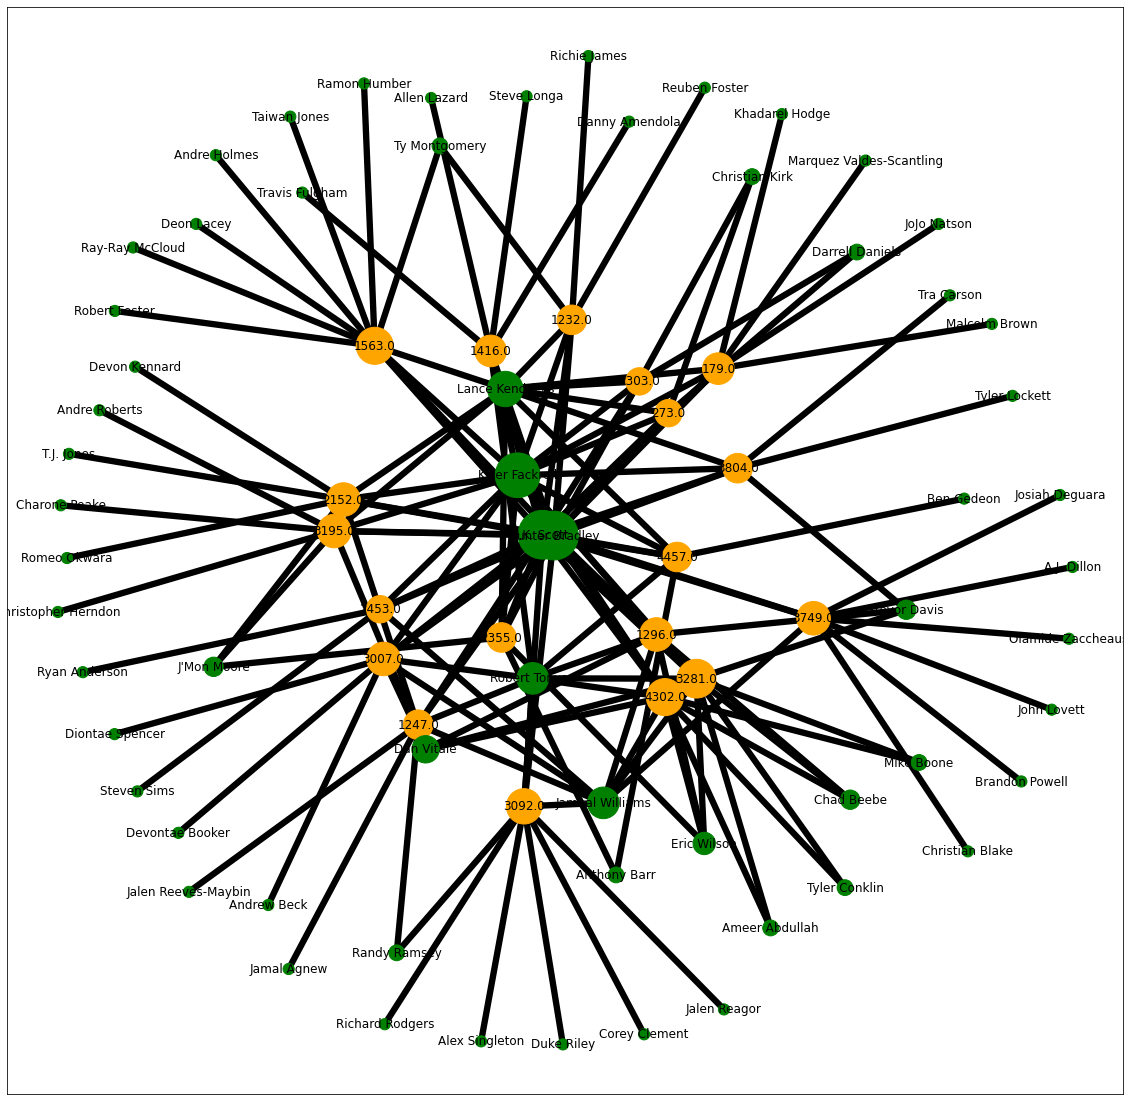

In [145]:
def showTeamConnections(player_connections_x):
    G = nx.Graph()
    
    player_connections_x['weight'] = player_connections_x.groupby(['player1','player2'])['player2'].transform('size')
    #player_connections_x['weight'] = np.log10(player_connections_x['weight'])
    number_of_plays = len(player_connections_x['weight'])
    player_connections_x['weight'] = (player_connections_x['weight'] / number_of_plays)*1000
    
    G = nx.from_pandas_edgelist(player_connections_x,source='player1',target='player2', edge_attr='weight')
    
    plt.figure(figsize=(20,20))
    pos = nx.kamada_kawai_layout(G)

    player1 = player_connections_x['player1'].unique()
    player2 = player_connections_x['player2'].unique()
               
    G.add_nodes_from(player1, layer = 0)
    G.add_nodes_from(player2, layer = 1)

    nodes = G.nodes()

    nodes_0 = set([n for n in nodes if G.nodes[n]['layer']==0])
    nodes_1 = set([n for n in nodes if G.nodes[n]['layer']==1])

    for n in G.nodes():
        G.nodes[n]['color'] = 'orange' if n in nodes_0 else 'green'
        #G.nodes[n]['label'] = playersDF.loc[playersDF['nflId'] == n, 'displayName'].iloc[0]
        G.nodes[n]['label'] = n
    colors = [node[1]['color'] for node in G.nodes(data=True)]
    
    node_colors = list(nx.get_node_attributes(G,'color').values())

    deg_centrality = nx.degree_centrality(G)
    centrality = np.fromiter(deg_centrality.values(), float)
    
    edge_width = list(nx.get_edge_attributes(G,'weight').values())

    nx.draw_networkx(G, pos , node_size=centrality*10e3, with_labels = True, 
            labels = nx.get_node_attributes(G, 'label'), node_color = node_colors, width = edge_width,)
    
    plt.show()
    return G
    
newG = showTeamConnections(player_connections)

# Player Interaction in Kickoff

In [47]:
def process_team_kickoffs( filter, team):
    df = playsDF.loc[(playsDF['specialTeamsPlayType'] == 'Kickoff') & (playsDF['specialTeamsResult'].isin(filter)) &
                    (playsDF['possessionTeam'] == team)]
    df = df[['playId', 'gameId','specialTeamsResult', 'playResult', 'possessionTeam', 'kickerId']]
    df['operationTime'] = 0
    df['hangTime'] = 0
    df['kickDirectionActual'] = 0
    df['kickDirectionIntended'] = 0
    df['ActualVsIntended'] = 0
    df['kickType'] = 0
    
    for index,  x in df.iterrows():
        df.loc[[index], ['operationTime']] = PFFScoutingDF['operationTime'].loc[x['playId'] == PFFScoutingDF['playId']]
        df.loc[[index], ['hangTime']] = PFFScoutingDF['hangTime'].loc[x['playId'] == PFFScoutingDF['playId']]
        df.loc[[index], ['kickDirectionActual']] = PFFScoutingDF['kickDirectionActual'].loc[x['playId'] == PFFScoutingDF['playId']]
        df.loc[[index], ['kickDirectionIntended']] = PFFScoutingDF['kickDirectionIntended'].loc[x['playId'] == PFFScoutingDF['playId']]
        actual = df.loc[index, 'kickDirectionActual']
        intended = df.loc[index, 'kickDirectionIntended']
        df.loc[index, 'ActualVsIntended'] = (actual == intended)
        df.loc[[index], ['kickType']] = PFFScoutingDF['kickType'].loc[x['playId'] == PFFScoutingDF['playId']]
        
    return df

In [48]:
playersDF.loc[ playersDF['nflId'] == 42356].displayName.values[0]
#playersDF['displayName'].iloc[playersDF['nflId'] == 42356]

'Andrus Peat'

In [49]:
team = 'GB'
good_filter = ['Muffed', 'Touchback']
good_punt_df = process_team_punts( good_filter, team )
kickoff_positions = ['G', 'LS', 'K', 'P', 'OLB', 'TE', 'RB', 'WR', 'T', 'OT', 'OG', 'HB']

playId_gameId_data = good_punt_df.groupby(['playId', 'gameId', 'kickerId']).size().reset_index().rename(columns={0:'count'})

player_connections = pd.DataFrame(columns = ["player1", "player2"])

for i, current_pair in playId_gameId_data.iterrows():
    co_players = mergedTrackingDF[(mergedTrackingDF['gameId'] == current_pair.gameId)
                        &(mergedTrackingDF['playId'] == current_pair.playId)
                        &(mergedTrackingDF['position'].isin(kickoff_positions))
                        &(mergedTrackingDF['frameId'] == 1)
                                 ]
    #print(co_players.shape)
    for j, x_co_player in co_players.iterrows():
        #new_connection = {'player1': current_pair.kickerId, 'player2': x_co_player.nflId}
        player_name = playersDF.loc[ playersDF['nflId'] == x_co_player.nflId].displayName.values[0]
        #new_connection = {'player1': current_pair.playId, 'player2': x_co_player.nflId}
        new_connection = {'player1': current_pair.playId, 'player2': player_name}
        #print(new_connection)
        player_connections = player_connections.append( new_connection, ignore_index = True)

In [50]:
#player_connections

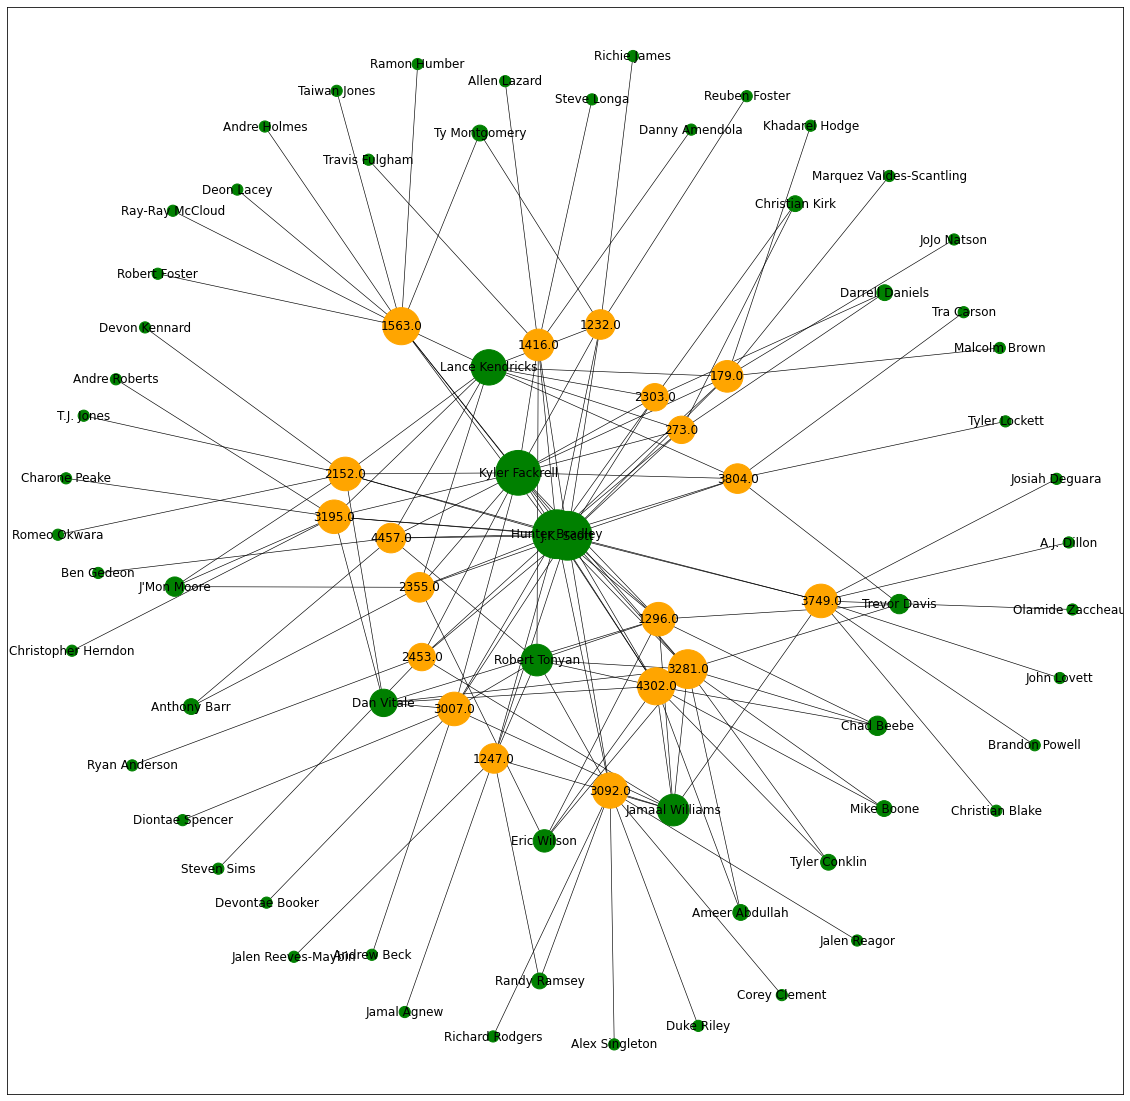

In [51]:
def showTeamKickoffConnections(player_connections_x):
    G = nx.Graph()
    
    player_connections_x['weight'] = player_connections_x.groupby(['player1','player2'])['player1'].transform('size')
    #player_connections_x['weight'] = np.log10(player_connections_x['weight'])
    number_of_plays = len(player_connections_x['weight'])
    player_connections_x['weight'] = (player_connections_x['weight'] / number_of_plays)*100
    
    G = nx.from_pandas_edgelist(player_connections_x,source='player1',target='player2', edge_attr='weight')
    
    plt.figure(figsize=(20,20))
    pos = nx.kamada_kawai_layout(G)

    player1 = player_connections_x['player1'].unique()
    player2 = player_connections_x['player2'].unique()
               
    G.add_nodes_from(player1, layer = 0)
    G.add_nodes_from(player2, layer = 1)

    nodes = G.nodes()

    nodes_0 = set([n for n in nodes if G.nodes[n]['layer']==0])
    nodes_1 = set([n for n in nodes if G.nodes[n]['layer']==1])

    for n in G.nodes():
        G.nodes[n]['color'] = 'orange' if n in nodes_0 else 'green'
        #G.nodes[n]['label'] = playersDF.loc[playersDF['nflId'] == n, 'displayName'].iloc[0]
        G.nodes[n]['label'] = n
    colors = [node[1]['color'] for node in G.nodes(data=True)]
    
    node_colors = list(nx.get_node_attributes(G,'color').values())

    deg_centrality = nx.degree_centrality(G)
    centrality = np.fromiter(deg_centrality.values(), float)
    
    edge_width = list(nx.get_edge_attributes(G,'weight').values())

    nx.draw_networkx(G, pos , node_size=centrality*10e3, with_labels = True, 
            labels = nx.get_node_attributes(G, 'label'), node_color = node_colors, width = edge_width,)
    
    plt.show()
    return G
    
newG = showTeamKickoffConnections(player_connections)

In [52]:
def edge_to_remove(graph):
    G_dict = nx.edge_betweenness_centrality(graph)
    edge = ()

  # extract the edge with highest edge betweenness centrality score
    for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
        edge = key
        break

    return edge

In [53]:
def girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while(sg_count == 1):
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)

    return sg

In [54]:
#pip install cdlib

In [55]:
c = girvan_newman(newG)
#c = algorithms.louvain(newG, weight='weight', resolution=1., randomize=False)

# find the nodes forming the communities
node_groups = []

for i in c:
    node_groups.append(list(i))

In [56]:
#node_groups

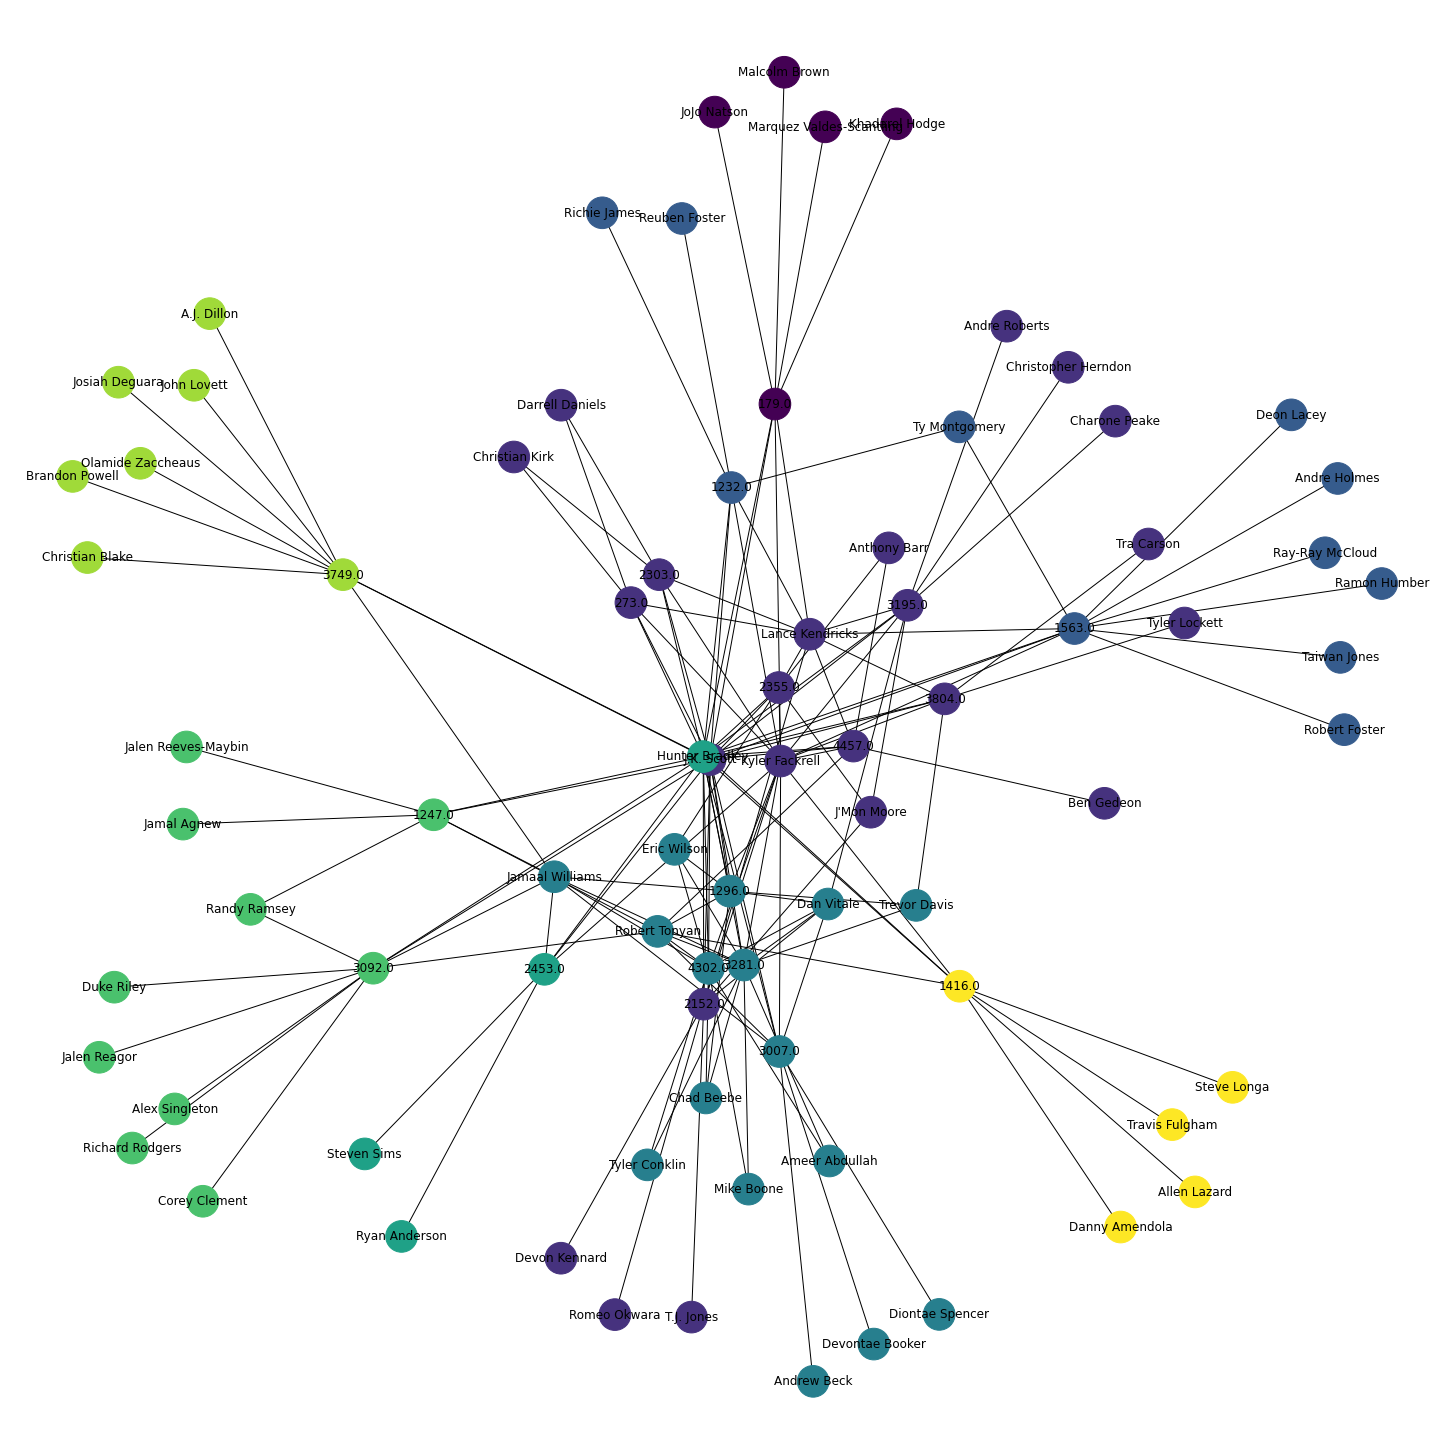

In [146]:
import community as community_louvain
import matplotlib.cm as cm

partition = community_louvain.best_partition(newG)

pos = nx.spring_layout(newG)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
plt.figure(figsize=(20,20))
#nx.draw_networkx_nodes(newG, pos, partition.keys(), node_size=40, with_labels=True,
#                        cmap=cmap, node_color=list(partition.values()))

nx.draw(newG, pos, node_size=1000, with_labels=True,
                        cmap=cmap, node_color=list(partition.values()))

#nx.draw_networkx_edges(newG, pos, alpha=0.5)
#nx.draw(newG, with_labels=True)
plt.show()

In [64]:
#node_groups
#player_connections_x.groupby(['player1','player2'])['player1'].transform('size')
comms = pd.DataFrame(partition.items(), columns = ['node', 'cluster'])
comms1 = comms.groupby(['cluster'])

In [65]:
#comms.loc[comms['cluster'] == 1]
comms['cluster'].unique()

array([0, 2, 5, 1, 4, 3, 6], dtype=int64)

In [66]:
'''
color_map = []
for node in newG:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  
plt.figure(figsize=(20,20))
nx.draw(newG, node_color=color_map, with_labels=True)
plt.show()
'''

"\ncolor_map = []\nfor node in newG:\n    if node in node_groups[0]:\n        color_map.append('blue')\n    else: \n        color_map.append('green')  \nplt.figure(figsize=(20,20))\nnx.draw(newG, node_color=color_map, with_labels=True)\nplt.show()\n"

# Ranking Punters Play Involvement in Good Plays

In [126]:
punters_dataframe = playsDF.loc[(playsDF['specialTeamsPlayType'] == "Punt")
                                & ( playsDF['specialTeamsResult'].isin(good_punt_filter))
                                ]

In [127]:
punters_dataframe

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45
5,2018090600,973,"(14:18) M.Bosher punts 49 yards to PHI 40, Cen...",2,4,19,ATL,Punt,Fair Catch,37267.0,...,NaN,NaN,NaN,0,3,NaN,49.0,NaN,49,21
13,2018090600,2406,"(12:33) C.Johnston punts 38 yards to ATL 20, C...",3,4,9,PHI,Punt,Fair Catch,45603.0,...,NaN,NaN,NaN,3,6,NaN,38.0,NaN,38,68
56,2018090900,4325,(3:02) (Punt formation) C.Bojorquez punts 43 y...,4,4,12,BUF,Punt,Fair Catch,46903.0,...,NaN,NaN,NaN,47,3,NaN,43.0,NaN,43,63
60,2018090901,313,(10:11) (Punt formation) B.Colquitt punts 48 y...,1,4,6,CLE,Punt,Touchback,34723.0,...,NaN,NaN,NaN,0,0,NaN,48.0,NaN,28,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19945,2021010314,3622,"(4:31) A.Lee punts 51 yards to end zone, Cente...",4,4,21,ARI,Punt,Touchback,29141.0,...,NaN,NaN,NaN,18,7,NaN,51.0,NaN,31,59
19949,2021010315,283,"(10:58) M.Wishnowsky punts 49 yards to SEA 17,...",1,4,1,SF,Punt,Fair Catch,47893.0,...,NaN,NaN,NaN,0,0,NaN,49.0,NaN,49,44
19950,2021010315,386,"(9:39) M.Dickson punts 63 yards to SF 11, Cent...",1,4,1,SEA,Punt,Fair Catch,46218.0,...,NaN,NaN,NaN,0,0,NaN,63.0,NaN,63,84
19951,2021010315,553,"(6:41) M.Wishnowsky punts 40 yards to SEA 32, ...",1,4,3,SF,Punt,Fair Catch,47893.0,...,NaN,NaN,NaN,0,0,NaN,40.0,NaN,40,38


In [128]:
summary_of_punters = punters_dataframe.groupby(['kickerId']).size().reset_index(name='count')
summary_of_punters['total'] = 0
summary_of_punters['displayName'] = 0

In [129]:
good_and_bad_filter = ['Fair Catch', 'Touchback', 'Out of Bounds', 'Return']
for index, current_punter in summary_of_punters.iterrows():
    summary_of_punters.loc[index, 'total'] = playsDF.loc[(playsDF['specialTeamsPlayType'] == "Punt")
                                                     & ( playsDF['specialTeamsResult'].isin(good_and_bad_filter))
                                                     & ( playsDF['kickerId'] == current_punter.kickerId)
                                                    ].size
    summary_of_punters.loc[index, 'displayName'] = playersDF.loc[ playersDF['nflId'] == current_punter.kickerId].displayName.values[0]

In [149]:
summary_of_punters['rate'] = summary_of_punters['count'] / summary_of_punters['total']
summary_of_punters1 = summary_of_punters.sort_values(by=['rate'], ascending = False)
summary_of_punters1[['displayName', 'count', 'total', 'rate']]

,displayName,count,total,rate
44,Hunter Niswander,13,500,0.026000
8,Matt Bosher,30,1450,0.020690
48,Joseph Charlton,18,875,0.020571
17,Pat O'Donnell,79,3925,0.020127
20,Jordan Berry,77,3950,0.019494
10,Bryan Anger,61,3150,0.019365
43,A.J. Cole,43,2225,0.019326
6,Thomas Morstead,67,3475,0.019281
2,Dustin Colquitt,38,1975,0.019241
33,J.K. Scott,76,3975,0.019119


# Ranking Punters Play Involvement in Good Plays

In [151]:
kickers_dataframe = playsDF.loc[(playsDF['specialTeamsPlayType'] == "Kickoff")
                                & ( playsDF['specialTeamsResult'].isin(good_kickoff_filter))
                                ]

summary_of_kickers = kickers_dataframe.groupby(['kickerId']).size().reset_index(name='count')
summary_of_kickers['total'] = 0
summary_of_kickers['displayName'] = 0

good_and_bad_filter = ['Fair Catch', 'Touchback', 'Out of Bounds', 'Return']
for index, current_kickers in summary_of_kickers.iterrows():
    summary_of_kickers.loc[index, 'total'] = playsDF.loc[(playsDF['specialTeamsPlayType'] == "Kickoff")
                                                     & ( playsDF['specialTeamsResult'].isin(good_and_bad_filter))
                                                     & ( playsDF['kickerId'] == current_kickers.kickerId)
                                                    ].size
    summary_of_kickers.loc[index, 'displayName'] = playersDF.loc[ playersDF['nflId'] == current_kickers.kickerId].displayName.values[0]

summary_of_kickers['rate'] = summary_of_kickers['count'] / summary_of_kickers['total']
summary_of_kickers1 = summary_of_kickers.sort_values(by=['rate'], ascending = False)
summary_of_kickers1[['displayName', 'count', 'total', 'rate']][:10]

,displayName,count,total,rate
53,Tristan Vizcaino,1,25,0.040000
48,Kaare Vedvik,3,75,0.040000
60,Joey Slye,137,3725,0.036779
29,Bradley Pinion,218,6575,0.033156
25,Chandler Catanzaro,52,1625,0.032000
19,Dustin Hopkins,162,5175,0.031304
55,Matt Gay,28,900,0.031111
64,Sterling Hofrichter,16,525,0.030476
44,Jason Sanders,165,5600,0.029464
14,Greg Zuerlein,173,5925,0.029198


In [141]:
summary_of_kickers.sort_values(by=['rate'])

,kickerId,count,total,displayName,rate
3,30403.0,1,425,Robbie Gould,0.002353
59,48329.0,1,375,Matthew Wright,0.002667
46,46342.0,10,1700,Michael Badgley,0.005882
43,46241.0,4,400,J.K. Scott,0.010000
50,46663.0,5,500,Matthew McCrane,0.010000
...,...,...,...,...,...
25,41736.0,52,1625,Chandler Catanzaro,0.032000
29,42508.0,218,6575,Bradley Pinion,0.033156
60,48337.0,137,3725,Joey Slye,0.036779
53,47590.0,1,25,Tristan Vizcaino,0.040000
